### Mini Project 3

# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [18]:
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## **Conversion Rate Analysis Based On Income, Spending And Age**

### Feature Engineering
---

In [20]:
df1 = df.copy()

In [21]:
# Membuat kolom baru untuk umur
df1['age'] = 2024 - df1['Year_Birth']

# Membuat tabel kelompok umur
df1['age_group'] = np.where(df1['age'] <= 40, '<40',
                   np.where(df1['age'] <= 60, '41-60',
                  '>60'))

# Membuat kolom untuk jumlah anak
df1['total_children'] = df1['Kidhome'] + df1['Teenhome']

# Membuat tabel total pengeluaran
df1['total_spending'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']

# Membuat tabel total transaksi
df1['total_transaction'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

# Membuat tabel conversion rate
df1['cvr'] = df1['Response'] / df1['NumWebVisitsMonth']

# Menampilkan tabel
df1.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,age,age_group,total_children,total_spending,total_transaction,cvr
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,3,11,1,67,>60,0,1617000,25,0.142857
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,3,11,0,70,>60,2,27000,6,0.000000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,3,11,0,59,41-60,0,776000,21,0.000000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,3,11,0,40,<40,1,53000,8,0.000000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,3,11,0,43,41-60,1,422000,19,0.000000


### Plot
---

In [25]:
# Menghitung rata-rata conversion rate per kelompok umur
age_group_mean = df1.groupby('age_group')['cvr'].mean().reset_index()
age_group_mean

,age_group,cvr
0,41-60,0.037010
1,<40,0.070370
2,>60,0.045453


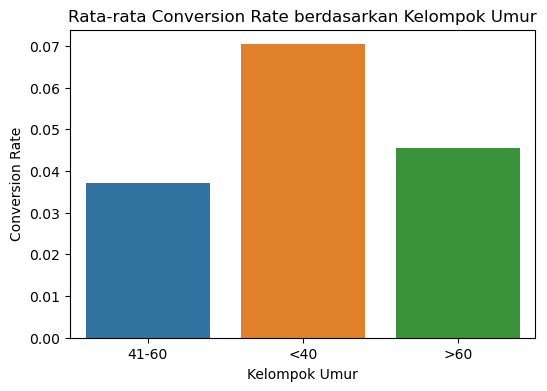

In [28]:
# Membuat plot
plt.figure(figsize=(6, 4))
sns.barplot(x='age_group', y='cvr', data=age_group_mean)
plt.title('Rata-rata Conversion Rate berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Conversion Rate')
plt.show()

**Kesimpulan:**
- Kelompok umur <40 tahun memiliki rata-rata tingkat conversion rate yang tinggi, yang menunjukkan kemungkinan ketertarikan terhadap marketing campaign yang ditawarkan dan juga adanya familiaritas terhadap teknologi dan platform online.
- Kelompok umur 40-60 tahun memiliki rata-rata tingkat conversion rate yang paling rendah, yang menunjukkan kemungkinan kurangnya ketertarikan terhadap marketing campaign yang ditawarkan.